### Imbalanced Learning

Imbalanced data involves cases where the different classes in your dataset are not balanced. In some circumcstances this is not a problem, for example when the sample accurately represents the true popoulation. However there are specific cases where it presents a problem, in particular when it is important to accurately classify an underrepresented class. In general this is important when the cost of missclassification is high, e.g. when the true population is more balanced than the sample. Also, as in our case, detecting fraud. While fraudulent transactions are rare, they are costly when they go undetected, because credit card companies must reimburse the customer for the fraudulent spending.

Imbalanced learning, then, involves techniques which are focused on overcoming the problems of imbalanced data, and accurately predicting to minimize the costs of misclassification in the true population. We examine several techniques:

### Concepts we can try:
 * focal loss 
 * cross entropy loss (?)
 * resampling: over and undersampling.
 * SMOTE (similar to imputation)
 * different algorithms (decision trees tend to work well with imbalanced data: need to write an explaanation of why)
 * different cost function with UNEQUAL MISSLCLASSIFICATION COSTS. (is this similar to focal loss??)
 * RUSBoost (in Matlab, is there an analogue for python?)

### Focal Loss
Focal loss in a type of loss function desinged for convolution neural networks, modified from Cross Entropy Loss. The idea is that on successive passes, weights are decreased for observations which have already been predicted correctly. In effect, the relative weight of difficult-to-classify observations increases.

### Focal Loss
 * benefit: faster training by skipping overrepresented data ?? (https://www.analyticsvidhya.com/blog/2020/08/a-beginners-guide-to-focal-loss-in-object-detection/)
 * this approach si speciically applide to CNN (?)
 ### Cross Entropy Loss
 penaliz wrong predictions more than right predictions
 ### Unequal Costs
 In some applications costs of misclassification may differ. In our case of email fraud this is readily apparent: misclassifying an transation as fraud causes some transactional costs and inconvenience to the consumer, but misclassifying a fraudulent transaction as real can cost the consumer or the credit card company thousands of dollars. For this reason, it seems prurient to consider a case where the amount is a function of our missclassification cost.
 
 $ E[classify as fraud | not fraud ] < $$ E[classify as real | fraud] $
 
 
 ### evaluation metrics
 F1 score and others commonly mentioned.
 https://keras.io/api/metrics/classification_metrics/
 recommended: 
 AUC
 
 also interesting for applied approach: total dollars lost?

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
df = pd.read_csv("creditcard.csv")
#Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have
#not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between
#each transaction and the first transaction in the dataset.

In [3]:
df.rename(columns = {'Class':'isFraud'}, inplace = True) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['isFraud'].value_counts()

0    284315
1       492
Name: isFraud, dtype: int64

(array([2.62369e+05, 1.31640e+04, 4.02500e+03, 1.96100e+03, 9.64000e+02,
        5.68000e+02, 3.64000e+02, 2.62000e+02, 1.23000e+02, 1.03000e+02,
        8.50000e+01, 5.90000e+01, 4.50000e+01, 4.70000e+01, 3.80000e+01,
        3.10000e+01, 2.20000e+01, 1.10000e+01, 1.40000e+01, 8.00000e+00,
        7.00000e+00, 3.00000e+00, 6.00000e+00, 5.00000e+00, 1.00000e+00,
        4.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

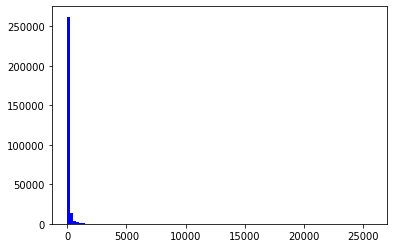

In [5]:
import matplotlib.pyplot as plt
plt.hist(df[df.isFraud == False]['Amount'], color='b', label='Real', bins=100)

(array([230.,  27.,  14.,   5.,  12.,   8.,   9.,   4.,   5.,   2.,   3.,
          6.,   3.,   5.,  38.,   7.,   3.,   5.,   3.,   1.,   3.,   1.,
          1.,   0.,   4.,   2.,   5.,   1.,   1.,   2.,   0.,   1.,   1.,
          4.,   2.,   3.,   2.,   0.,   3.,   0.,   1.,   2.,   0.,   2.,
          4.,   5.,   0.,   1.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

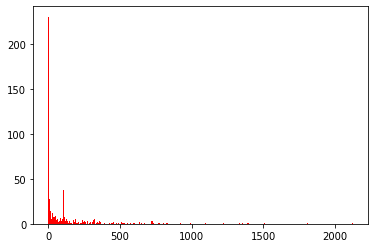

In [6]:
plt.hist(df[df.isFraud == True]['Amount'], color='r', label='Fraud', bins=300)

##### clean data.

In [7]:
def norm(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [8]:
from sklearn.model_selection  import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:, -1]
y = keras.utils.to_categorical(y, num_classes=2)

X_orig = X
X = norm(X) #normalize the data to N(0,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### build keras neural network models [BE MORE SPECIFIC! ]

In [9]:
from tensorflow.keras.models import Sequential
import tensorflow as tf

mod_focal = Sequential()

from tensorflow.keras.layers import Dense

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

mod_focal.add(Dense(10, input_dim=input_dim, activation='relu', name='input'))
mod_focal.add(Dense(20, activation='relu', name='fc1'))
mod_focal.add(Dense(10, activation='relu', name='fc2'))
mod_focal.add(Dense(nb_classes, activation='softmax', name='output'))

In [21]:
mod_ce_acc = tf.keras.models.clone_model(mod_focal)
mod_ce_acc.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
                     
mod_ce_rec = tf.keras.models.clone_model(mod_focal)
mod_ce_rec.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['recall'])
              
mod_dectree = tf.keras.models.clone_model(mod_focal)
mod_unequal = tf.keras.models.clone_model(mod_focal)


In [22]:
# focal loss method, source: github link

class FocalLoss(keras.losses.Loss):
    def __init__(self, gamma=2., alpha=4.,
                 reduction=keras.losses.Reduction.AUTO, name='focal_loss'):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})
        """
        super(FocalLoss, self).__init__(reduction=reduction,
                                        name=name)
        self.gamma = float(gamma)
        self.alpha = float(alpha)

    def call(self, y_true, y_pred):
        """
        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(
            tf.subtract(1., model_out), self.gamma))
        fl = tf.multiply(self.alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)


mod_focal.compile(loss=FocalLoss(alpha=1),
              optimizer='nadam',
              metrics=['accuracy'])


##### train our models

In [23]:
mod_focal.summary()
mod_focal.fit(X_train, y_train, epochs=3, batch_size=1000) #fit model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 10)                310       
_________________________________________________________________
fc1 (Dense)                  (None, 20)                220       
_________________________________________________________________
fc2 (Dense)                  (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 762
Trainable params: 762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
228/228 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 0.9993
Epoch 2/3
228/228 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 0.9994
Epoch 3/3
228/228 [==============================] - 0s 2m

ValueError: in user code:

    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:759 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:388 update_state
        self.build(y_pred, y_true)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:318 build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    /usr/local/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1135 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    /usr/local/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1234 map_structure_with_tuple_paths_up_to
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /usr/local/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1234 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /usr/local/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1137 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:419 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:419 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:438 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3483 get
        return deserialize(str(identifier))
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3439 deserialize
        return deserialize_keras_object(
    /usr/local/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:377 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: recall


In [24]:
mod_ce_acc.fit(X_train, y_train, epochs=3, batch_size=1000)


Epoch 1/3
228/228 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9982
Epoch 2/3
228/228 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9982
Epoch 3/3
228/228 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9982


In [25]:
mod_ce_rec.fit(X_train, y_train, epochs=3, batch_size=1000)

Epoch 1/3


TypeError: 'NoneType' object is not callable

##### evaluate our models.

In [ ]:
score = mod_focal.evaluate(X_test, y_test, batch_size=1000) #evaluate fit using ??? method.

In [ ]:
# TO DO: instead of confusion matrix, use the ML things they tend to use: accuracy, and th eother two.

In [ ]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
predictions = mod_focal.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
values = confusion_matrix.view()
error_count = values.sum() - np.trace(values)
error_count

#### new metric: amount of money lost by company due to fraud. (assuming they reimburse all fraud cases)

In [ ]:
#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))